In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dna_sequences.csv to dna_sequences (1).csv


Aperçu du jeu de données :
     0_a    0_c    0_g    0_t    1_a    1_c    1_g    1_t    2_a    2_c  ...  \
0  False  False  False   True   True  False  False  False  False   True  ...   
1  False  False  False   True  False  False   True  False  False   True  ...   
2  False  False   True  False  False  False  False   True   True  False  ...   
3   True  False  False  False   True  False  False  False  False  False  ...   
4  False  False  False   True  False   True  False  False  False  False  ...   

    54_t   55_a   55_c   55_g   55_t   56_a   56_c   56_g   56_t  Class  
0  False  False  False   True  False  False  False  False   True   True  
1  False   True  False  False  False   True  False  False  False   True  
2  False  False   True  False  False  False  False   True  False   True  
3  False  False  False  False   True  False   True  False  False   True  
4   True   True  False  False  False  False  False   True  False   True  

[5 rows x 229 columns]

Statistiques descriptiv

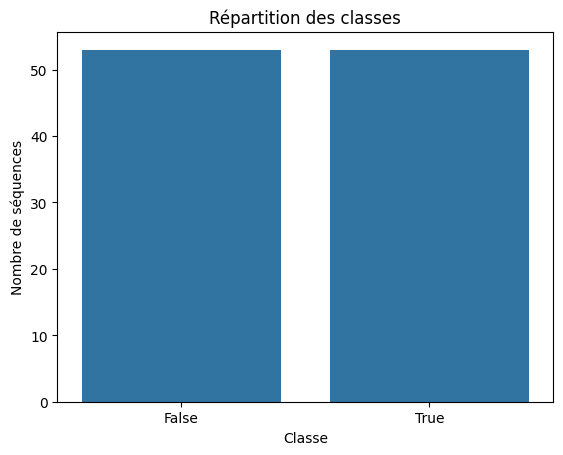

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# ===== Classe représentant une séquence ADN =====
class DNASequence:
    def __init__(self, sequence, label=None):
        self.sequence = sequence.replace('\t', '')
        self.label = label
        self.encoded = None

    def one_hot_encode(self):
        mapping = {
            'A': [1, 0, 0, 0],
            'C': [0, 1, 0, 0],
            'G': [0, 0, 1, 0],
            'T': [0, 0, 0, 1]
        }
        self.encoded = []
        for nucleotide in self.sequence:
            self.encoded.extend(mapping.get(nucleotide, [0, 0, 0, 0]))
        return self.encoded

    def __str__(self):
        return f"DNASequence(sequence={self.sequence[:10]}..., label={self.label})"

# ===== Classe principale pour l’analyse =====
class DNAAnalyzer:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)
        self.sequences = []

    def explore_data(self):
        print("Aperçu du jeu de données :")
        print(self.df.head())
        print("\nStatistiques descriptives :")
        print(self.df.describe())
        print("\nValeurs manquantes :")
        print(self.df.isnull().sum())

    def preprocess(self):
        for _, row in self.df.iterrows():
            seq_str = ''.join(map(str, row[:-1]))
            label = row["Class"]
            seq = DNASequence(seq_str, label)
            seq.one_hot_encode()
            self.sequences.append(seq)

    def train_model(self):
        X = np.array([s.encoded for s in self.sequences])
        y = np.array([1 if s.label == '+' else 0 for s in self.sequences])
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print("\n--- Résultats du modèle ---")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))

    def show_class_distribution(self):
        sns.countplot(x="Class", data=self.df)
        plt.title("Répartition des classes")
        plt.xlabel("Classe")
        plt.ylabel("Nombre de séquences")
        plt.show()

# ======== Lancement ========
if __name__ == "__main__":
    analyzer = DNAAnalyzer("dna_sequences.csv")
    analyzer.explore_data()
    analyzer.preprocess()
    analyzer.train_model()
    analyzer.show_class_distribution()
